<a href="https://colab.research.google.com/github/seary05/TugasSemester1/blob/main/Analisis_saham_entertainment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PENDAHULUAN**

## **Alasan**
Dalam contoh ini, kita memilih empat ticker yaitu WBD, PSKY, NFLX, dan DIS yang semuanya merupakan perusahaan di industri hiburan dan media streaming. Pemilihan saham-saham ini bertujuan untuk membandingkan kinerja perusahaan-perusahaan yang bergerak di bidang yang sama yaitu entertaiment.

Kita memilih saham di sektor perfilman dikarenakan saat ini dunia entertaiment terutama film itu sangat di minati oleh banyak orang, namun kami melihat bahwa industri ini sedang dalam tahap yang kurang baik, walaupun memang terdapat perkembangan dengan adanya model bisnis baru berupa streaming service, maka dari itu kami ingin menganalisis kinerja sahamnya apakah bagus untuk dibeli atau tidak.

## **MODEL BISNIS**
Disney(DIS):
1. Rumah Produksi untuk pembuatan film dan series
2. Taman Hiburan dan Resor
3. Kapal Pesiar
4. Streaming Service
5. Studio Musik

WarnerBros(WBD):
1. Rumah Produksi untuk pembuatan film dan series
2. Jaringan televisi seperti CNN dan Discovery
3. Streaming Service

Paramount(PSKY):
1. Rumah Produksi untuk pembuatan film dan series
2. Jaringan televisi seperti CBS
3. Streaming Service

Netflix(NFLX):
1. Streaming Service
2. Rumah Produksi untuk pembuatan film dan series





# **IMPORT LIBRARY**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
import datetime

print("Semua pustaka yang diperlukan telah diimpor.")

Semua pustaka yang diperlukan telah diimpor.


# **GAMBARAN UMUM DATA**

In [ ]:
# 1. SIMBOL TICKER
tickers = ['WBD','PSKY','DIS','NFLX']

# 2. TANGGAL MULAI DAN TANGGAL LAHIR
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=7*365)

# 3. UNDUH DAN SIMPAN KE DATA FRAME
stock_data_yf = pd.DataFrame()

for ticker in tickers:
    try:
        data = yf.download(ticker, start=start_date, end=end_date, progress=False)
        if not data.empty:
            if 'Adj Close' in data.columns:
                stock_data_yf[ticker] = data['Adj Close']
            elif 'Close' in data.columns:
                stock_data_yf[ticker] = data['Close']
                print(f"Warning: 'Adj Close' not found for {ticker}, using 'Close' price.")
            else:
                print(f"Could not find 'Adj Close' or 'Close' data for {ticker}.")
        else:
            print(f"No data downloaded for {ticker}.")
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

stock_data_yf.dropna(inplace=True)

/tmp/ipython-input-144599314.py:13: FutureWarning:

YF.download() has changed argument auto_adjust default to True

/tmp/ipython-input-144599314.py:13: FutureWarning:

YF.download() has changed argument auto_adjust default to True



/tmp/ipython-input-144599314.py:13: FutureWarning:

YF.download() has changed argument auto_adjust default to True



/tmp/ipython-input-144599314.py:13: FutureWarning:

YF.download() has changed argument auto_adjust default to True



In [ ]:
# 4. LIHAT DATA
print("Data harga saham historis (Adj Close) untuk 5 saham:")
display(stock_data_yf.head())

print("\nInformasi DataFrame:\n")
stock_data_yf.info()

Data harga saham historis (Adj Close) untuk 5 saham:


,WBD,PSKY,DIS,NFLX
Date,,,,
2018-12-13,27.969999,40.376144,110.184120,27.601999
2018-12-14,27.969999,40.494118,109.027771,26.684000
2018-12-17,27.520000,39.457546,107.492439,26.280001
2018-12-18,26.900000,38.935043,106.355515,27.094000
2018-12-19,26.879999,38.235546,106.132027,26.677000



Informasi DataFrame:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1758 entries, 2018-12-13 to 2025-12-10
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WBD     1758 non-null   float64
 1   PSKY    1758 non-null   float64
 2   DIS     1758 non-null   float64
 3   NFLX    1758 non-null   float64
dtypes: float64(4)
memory usage: 68.7 KB


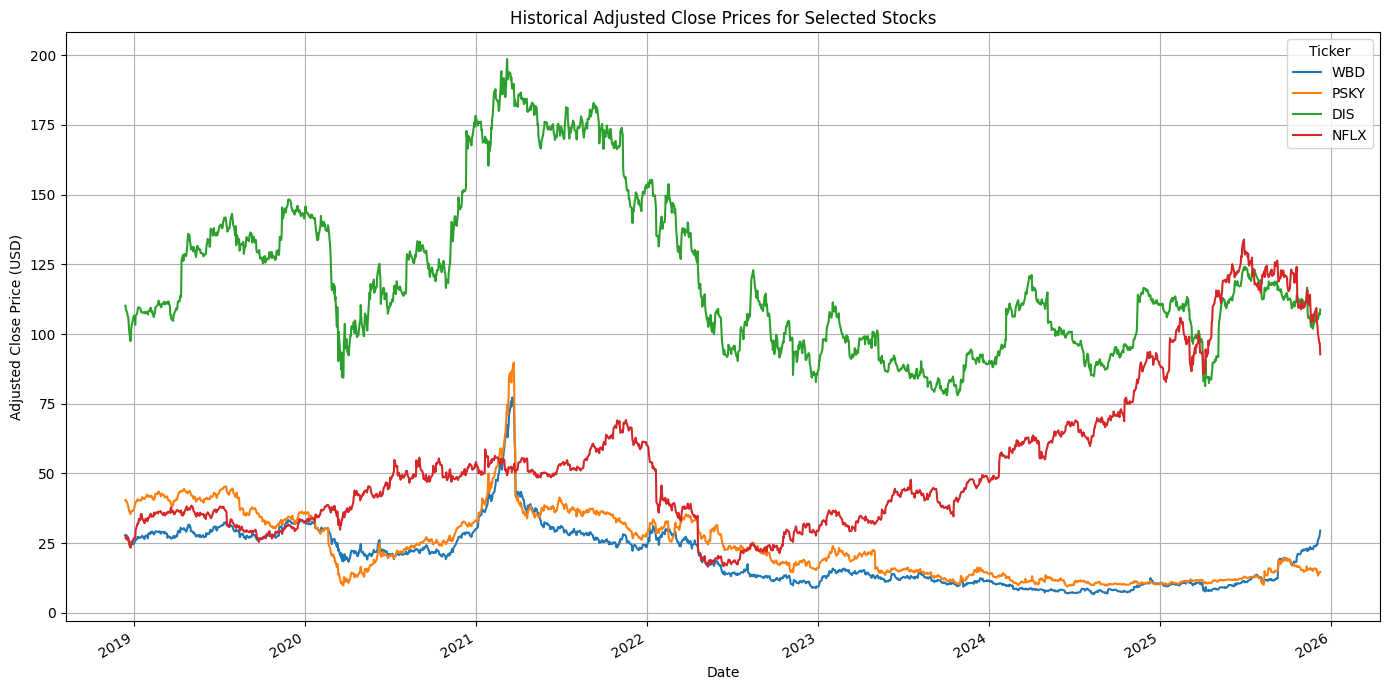

Grafik harga saham historis telah ditampilkan.


In [ ]:
# 5. Plot harga penutupan
plt.figure(figsize=(14, 7))
stock_data_yf.plot(ax=plt.gca())
plt.title('Historical Adjusted Close Prices for Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.legend(title='Ticker')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Grafik harga saham historis telah ditampilkan.")

# **Eksplorasi dan Pra-pemrosesan Data**

In [ ]:
# 1. INFO RINGKAS
print("Informasi Ringkas DataFrame stock_data_yf:")
stock_data_yf.info()

# 2. SUMARY DATA
print("\nStatistik Deskriptif DataFrame stock_data_yf:")
display(stock_data_yf.describe())

# 3. CEK MISSING VALUE
print("\nJumlah Nilai Hilang per Kolom di stock_data_yf:")
display(stock_data_yf.isnull().sum())

Informasi Ringkas DataFrame stock_data_yf:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1758 entries, 2018-12-13 to 2025-12-10
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WBD     1758 non-null   float64
 1   PSKY    1758 non-null   float64
 2   DIS     1758 non-null   float64
 3   NFLX    1758 non-null   float64
dtypes: float64(4)
memory usage: 68.7 KB

Statistik Deskriptif DataFrame stock_data_yf:


,WBD,PSKY,DIS,NFLX
count,1758.000000,1758.000000,1758.000000,1758.000000
mean,20.035432,24.111601,119.862423,53.415110
std,10.422847,12.361125,28.191279,27.039791
min,6.710000,9.416198,78.019363,16.636999
25%,11.072500,13.006297,97.980194,34.690249
50%,19.545000,21.314840,112.150314,47.779499
75%,27.680000,34.021220,135.557663,62.221000
max,77.269997,89.804535,198.599213,133.912994



Jumlah Nilai Hilang per Kolom di stock_data_yf:


,0
WBD,0
PSKY,0
DIS,0
NFLX,0


In [ ]:
# 4. DAILY RETURNS
daily_returns = stock_data_yf.pct_change().dropna()

# 5. Hitung monthly returns
monthly_returns = stock_data_yf.resample('ME').last().pct_change().dropna()

# 6. Normalisasi data (harian)
normalized_stock_data = stock_data_yf / stock_data_yf.iloc[0]

# 7. Normalisasi data per month
normalized_stock_data_month = stock_data_yf.resample('ME').last() / stock_data_yf.iloc[0]

# 7. Tampilkan lima baris pertama dari daily_returns, monthly_returns, dan normalized_stock_data
print("\nLima Baris Pertama Daily Returns:")
print(daily_returns.head())

print("\nLima Baris Pertama Monthly Returns:")
print(monthly_returns.head())

print("\nLima Baris Pertama Normalized Stock Data:")
print(normalized_stock_data.head())

print("\nLima Baris Pertama Normalized Stock Data Bulanan:")
print(normalized_stock_data_month.head())


Lima Baris Pertama Daily Returns:
                 WBD      PSKY       DIS      NFLX
Date                                              
2018-12-14  0.000000  0.002922 -0.010495 -0.033258
2018-12-17 -0.016089 -0.025598 -0.014082 -0.015140
2018-12-18 -0.022529 -0.013242 -0.010577  0.030974
2018-12-19 -0.000744 -0.017966 -0.002101 -0.015391
2018-12-20 -0.037946 -0.027110 -0.020326 -0.023203

Lima Baris Pertama Monthly Returns:
                 WBD      PSKY       DIS      NFLX
Date                                              
2019-01-31  0.147130  0.131290  0.017054  0.268400
2019-02-28  0.018323  0.015163  0.011836  0.054786
2019-03-31 -0.065052 -0.049896 -0.016040 -0.004301
2019-04-30  0.143597  0.078687  0.233631  0.039208
2019-05-31 -0.117799 -0.058319 -0.035993 -0.073568

Lima Baris Pertama Normalized Stock Data:
                 WBD      PSKY       DIS      NFLX
Date                                              
2018-12-13  1.000000  1.000000  1.000000  1.000000
2018-12-14  1.0000

# **VISUALISASI DATA AWAL**

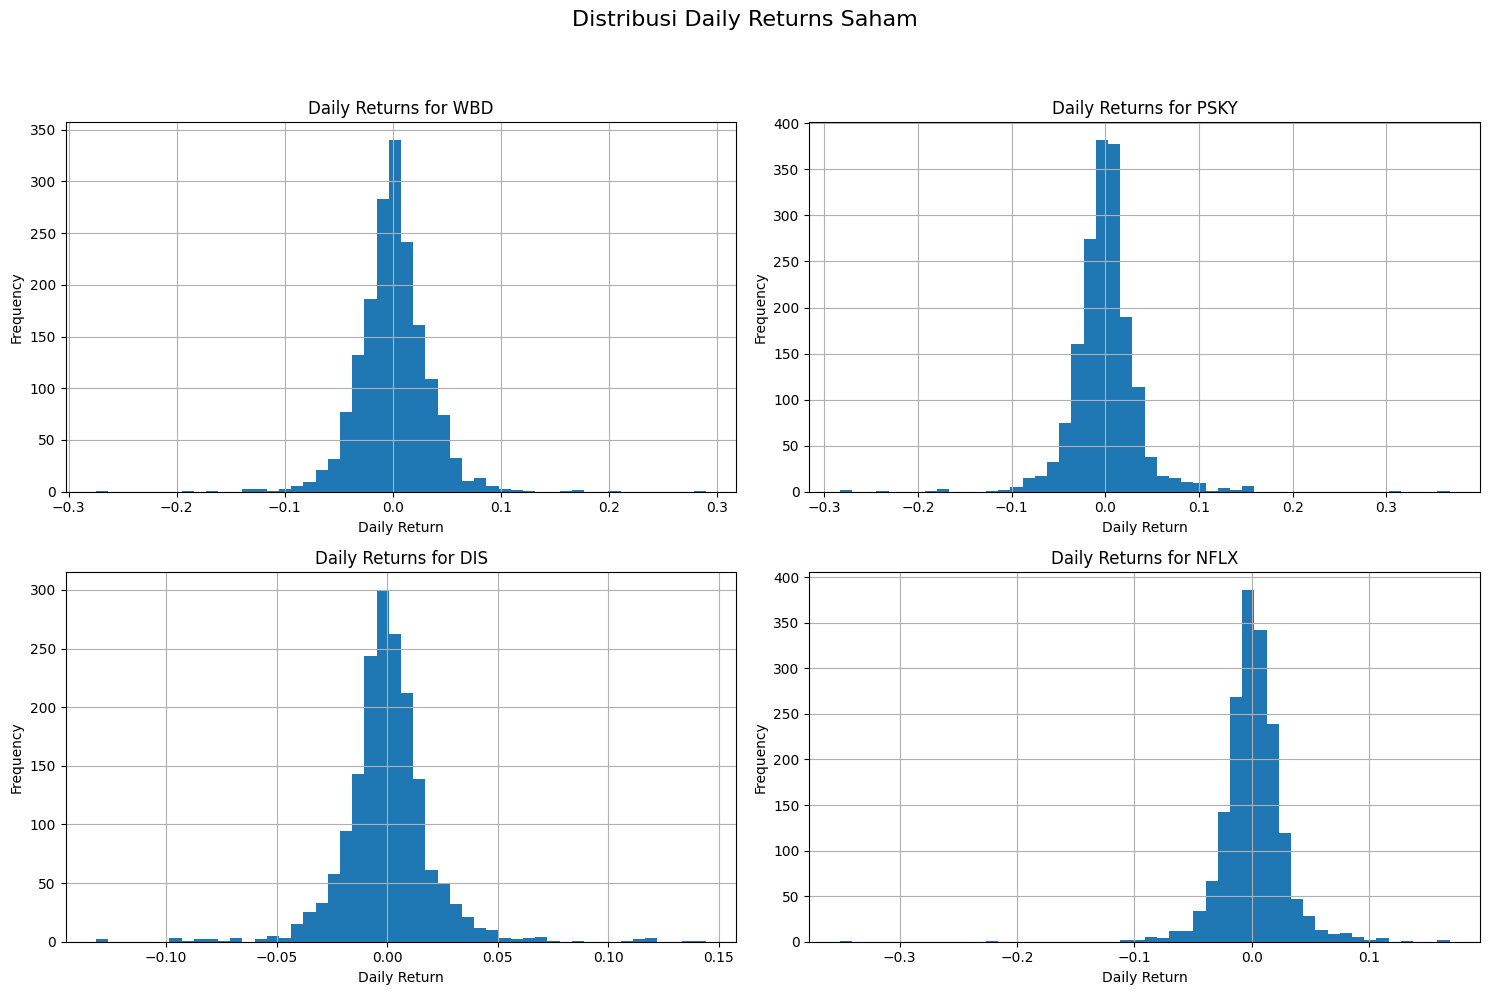

Histograms untuk daily returns telah ditampilkan.


In [ ]:
# 1. MEMBUAT HISTOGRAM UNTUK DAILY RETURNS
hist_axes = daily_returns.hist(bins=50, figsize=(15, 10))

# 2. SUBTITTLE
fig_hist = plt.gcf()
fig_hist.suptitle('Distribusi Daily Returns Saham', y=1.02, fontsize=16)

# 3. MERAPIKAN ARRAY SUMBU JIKA 2D
if isinstance(hist_axes, (list, np.ndarray)) and len(hist_axes.shape) > 1: hist_axes = hist_axes.flatten()

for i, ax in enumerate(hist_axes):
    # Ensure we don't go out of bounds for daily_returns.columns (though hist() should match)
    if i < len(daily_returns.columns):
        ax.set_xlabel('Daily Return')
        ax.set_ylabel('Frequency')
        ax.set_title(f'Daily Returns for {daily_returns.columns[i]}')

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent title overlap
plt.show()

print("Histograms untuk daily returns telah ditampilkan.")



Histogram daily returns menunjukkan perubahan harga dalam satu hari. Sebagian besar return berada dekat 0%, karena harga saham biasanya berubah sedikit setiap hari. Namun, sesekali muncul return yang lebih besar ke arah positif atau negatif. Kenaikan return yang besar bisa terjadi saat ada berita baik mendadak atau minat beli tinggi, sedangkan penurunan tajam bisa muncul saat ada isu negatif, sentimen pasar buruk, atau kekhawatiran investor. Pola ini membantu menggambarkan seberapa sering dan seberapa besar harga saham bergerak setiap harinya.


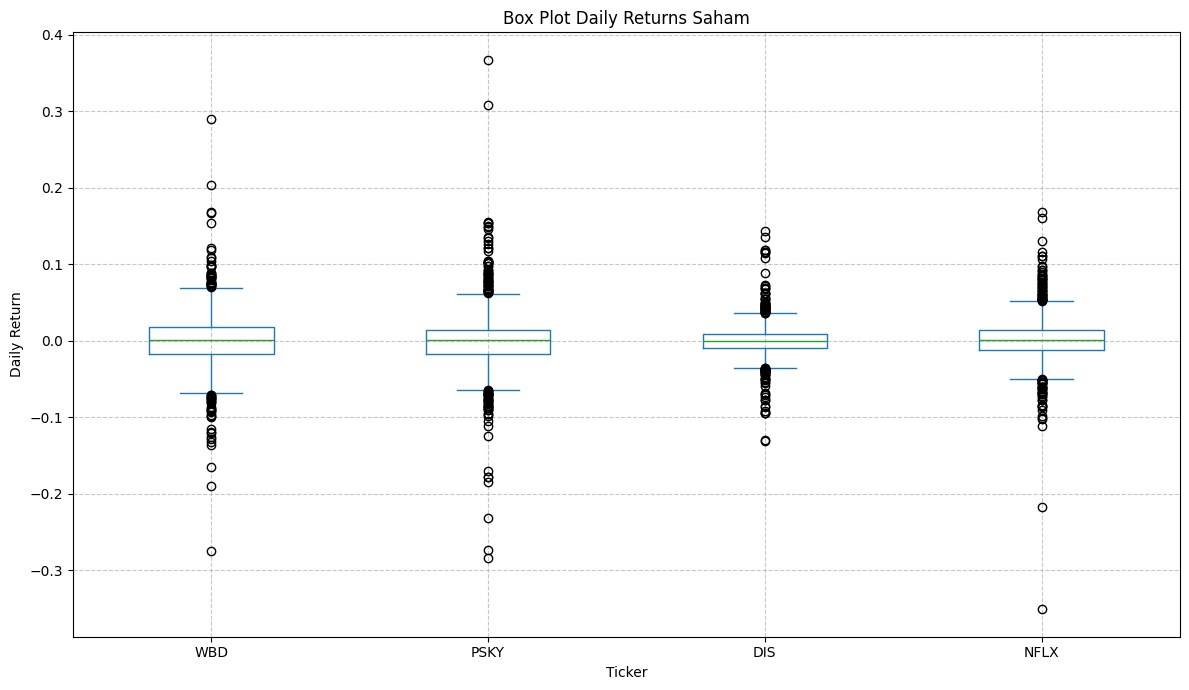

Box plots untuk daily returns telah ditampilkan.


In [ ]:
# 2. Buat box plot untuk return harian
plt.figure(figsize=(12, 7))
daily_returns.plot(kind='box', ax=plt.gca())
plt.title('Box Plot Daily Returns Saham')
plt.xlabel('Ticker')
plt.ylabel('Daily Return')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Box plots untuk daily returns telah ditampilkan.")

Boxplot menunjukkan penyebaran daily returns dari setiap saham (WBD, PSKY, DIS, NFLX). Kotak di tengah menggambarkan area pergerakan normal harga harian, sedangkan garis median menunjukkan titik tengahnya. Titik-titik di luar kotak disebut outlier, yang dimana outlier yaitu perubahan harga yang jauh lebih besar atau lebih kecil dibanding hari-hari biasanya.





# **Visualisasi Interaktif**

Pendapatan yang diperoleh dari setiap saham selama 7 tahun terakhir hingga 30 Juni 2025 bisa dibilang cukup merata dengan modus perubahan harga berada di sekitaran 0%

In [ ]:
!pip install plotly_express
import plotly_express as px

# 1. Buat line plot interaktif untuk normalized_stock_data
fig_normalized_prices = px.line(
    normalized_stock_data,
    x=normalized_stock_data.index,
    y=normalized_stock_data.columns,
    title='Perbandingan Harga Saham yang Dinormalisasi (Interaktif)',
    labels={'index': 'Tanggal', 'value': 'Harga Dinormalisasi'},
    hover_name=normalized_stock_data.columns.name # Display ticker name on hover
)

fig_normalized_prices.update_layout(
    xaxis_title='Tanggal',
    yaxis_title='Harga Dinormalisasi'
)

fig_normalized_prices.show()

print("Line plot interaktif untuk harga saham yang dinormalisasi telah ditampilkan.")

Line plot interaktif untuk harga saham yang dinormalisasi telah ditampilkan.


Grafik line plot menunjukkan perubahan harga saham dari tahun ke tahun, dan terlihat bahwa tiap saham memiliki pola naik dan turun yang berbeda. Pergerakan ini membuat grafik terlihat mencerminkan reaksi investor terhadap kondisi perusahaan dan ekonomi.


In [ ]:
# 2. Buat histogram interaktif untuk daily_returns

print("Membuat histogram interaktif untuk daily returns setiap saham...")

for col in daily_returns.columns:
    fig_hist_daily_returns = px.histogram(
        daily_returns,
        x=col,
        nbins=50, # Number of bins
        title=f'Distribusi Daily Returns Interaktif untuk {col}',
        labels={col: 'Daily Return', 'count': 'Frekuensi'}
    )
    fig_hist_daily_returns.update_layout(xaxis_title='Daily Return', yaxis_title='Frekuensi')
    fig_hist_daily_returns.show()

print("Histogram interaktif untuk daily returns telah ditampilkan.")

Membuat histogram interaktif untuk daily returns setiap saham...


Histogram interaktif untuk daily returns telah ditampilkan.


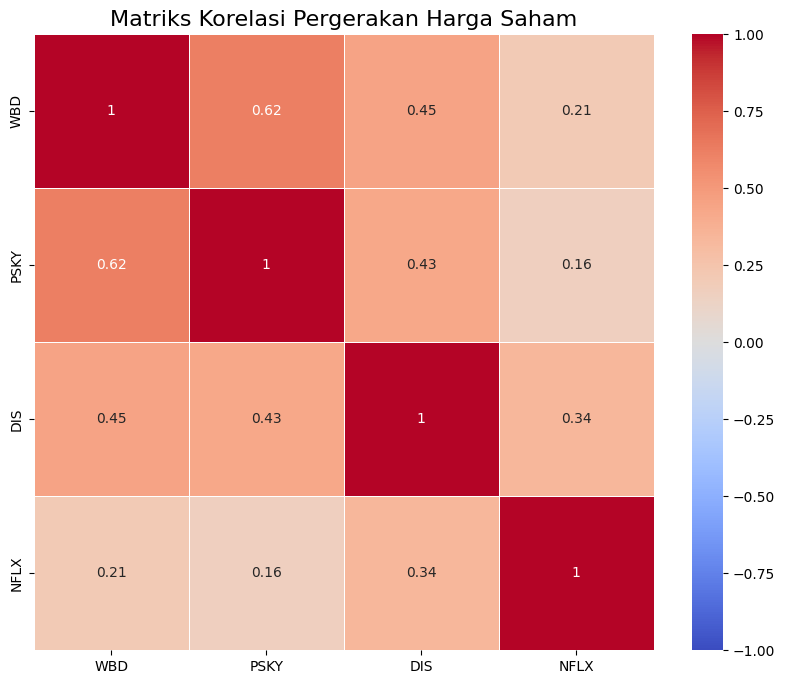

In [ ]:
# Matriks Korelasi
# Melihat seberapa erat hubungan pergerakan antar saham
correlation = daily_returns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Matriks Korelasi Pergerakan Harga Saham', fontsize=16)
plt.show()

Matriks korelasi itu menunjukkan seberapa mirip pergerakan harga antar saham. Nilai mendekati 1 berarti geraknya sangat mirip, sedangkan mendekati 0 berarti tidak begitu berkaitan. Dari matriks korelasi tersebut, terlihat bahwa WBD dan PSKY memiliki korelasi cukup tinggi (0.63), artinya harganya sering bergerak searah. Sementara korelasi dengan NFLX cenderung rendah, sehingga pergerakannya lebih independen dibanding yang lain.



In [ ]:
TRADING_DAYS_PER_YEAR = 251
RISK_FREE_RATE = 0.01 # Asumsi 1% tingkat bebas risiko tahunan

# 2. Hitung Cumulative Return untuk setiap saham
cumulative_returns = (1 + daily_returns).prod() - 1

# 3. Hitung Annual Return untuk setiap saham
# Menggunakan rata-rata aritmetika yang di-annualisasi dari daily returns
annual_returns = daily_returns.mean() * TRADING_DAYS_PER_YEAR

# 4. Hitung Annualized Volatility untuk setiap saham
annualized_volatility = daily_returns.std() * np.sqrt(TRADING_DAYS_PER_YEAR)

# 6. Hitung Sharpe Ratio untuk setiap saham
sharpe_ratios = (annual_returns - RISK_FREE_RATE) / annualized_volatility

# 7. Buat DataFrame untuk menampilkan metrik yang dihitung
portfolio_metrics = pd.DataFrame({
    'Cumulative Return': cumulative_returns,
    'Annual Return': annual_returns,
    'Annualized Volatility': annualized_volatility,
    'Sharpe Ratio': sharpe_ratios,

})

print("Metrik Portofolio untuk Setiap Saham:")
print(portfolio_metrics.round(4))


Metrik Portofolio untuk Setiap Saham:
      Cumulative Return  Annual Return  Annualized Volatility  Sharpe Ratio
WBD              0.0558         0.1474                 0.5278        0.2603
PSKY            -0.6354         0.0131                 0.5606        0.0056
DIS             -0.0123         0.0494                 0.3207        0.1229
NFLX             2.3588         0.2676                 0.4283        0.6013


Cumulative Return (Pengembalian Kumulatif): Pengembalian kumulatif mengukur total perubahan nilai investasi dari awal periode hingga akhir periode, tanpa memperhitungkan fluktuasi di antaranya


Annual Return (Pengembalian Tahunan): Pengembalian tahunan adalah tingkat pengembalian rata-rata yang diperoleh investasi dalam setahun. Ini membantu membandingkan kinerja investasi dengan jangka waktu yang berbeda secara adil.

Annualized Volatility (Volatilitas Tahunan) / Risiko: Volatilitas tahunan mengukur seberapa besar fluktuasi harga suatu aset atau portofolio dalam setahun.

Sharpe Ratio (Rasio Sharpe): Rasio Sharpe adalah metrik yang digunakan untuk mengevaluasi kinerja investasi dengan memperhitungkan risikonya. Rasio ini mengukur kelebihan pengembalian (return di atas tingkat bebas risiko) per unit risiko.

In [ ]:
import numpy as np

# 8. Asumsikan bobot yang sama untuk setiap saham dalam portofolio
# Anda bisa memodifikasi bobot ini untuk analisis sensitivitas
num_assets = len(tickers)
weights = np.array([1/num_assets] * num_assets)

# Pastikan bobot yang digunakan memiliki indeks kolom yang sama dengan daily_returns
weights_df = pd.Series(weights, index=daily_returns.columns)

# 9. Hitung daily returns portofolio
portfolio_daily_returns = daily_returns.dot(weights)

# Tampilkan lima baris pertama daily returns portofolio
print("Lima Baris Pertama Daily Returns Portofolio:")
print(portfolio_daily_returns.head())

Lima Baris Pertama Daily Returns Portofolio:
Date
2018-12-14   -0.010208
2018-12-17   -0.017727
2018-12-18   -0.003843
2018-12-19   -0.009050
2018-12-20   -0.027146
dtype: float64


Bobot menunjukkan porsi dana investasi untuk setiap saham di dalam portofolio.

In [ ]:
# 10. Hitung Cumulative Return Portofolio
portfolio_cumulative_return = (1 + portfolio_daily_returns).prod() - 1

# 11. Hitung Annual Return Portofolio
portfolio_annual_return = portfolio_daily_returns.mean() * TRADING_DAYS_PER_YEAR

# 12. Hitung Annualized Volatility Portofolio
portfolio_annualized_volatility = portfolio_daily_returns.std() * np.sqrt(TRADING_DAYS_PER_YEAR)

# 13. Hitung Sharpe Ratio Portofolio
portfolio_sharpe_ratio = (portfolio_annual_return - RISK_FREE_RATE) / portfolio_annualized_volatility

# 14. Tampilkan metrik portofolio
print("\nMetrik Keseluruhan Portofolio (Bobot Sama):")
print(f"Cumulative Return: {portfolio_cumulative_return:.4f}")
print(f"Annual Return: {portfolio_annual_return:.4f}")
print(f"Annualized Volatility: {portfolio_annualized_volatility:.4f}")
print(f"Sharpe Ratio: {portfolio_sharpe_ratio:.4f}")


Metrik Keseluruhan Portofolio (Bobot Sama):
Cumulative Return: 0.5451
Annual Return: 0.1194
Annualized Volatility: 0.3373
Sharpe Ratio: 0.3242


## WEEK 3

In [ ]:
import numpy as np
import pandas as pd

# 1. Tetapkan jumlah simulasi portofolio
num_portfolios = 20000 # Contoh: 10.000 atau 20.000

# Inisialisasi daftar kosong untuk menyimpan hasil simulasi
portfolio_returns = []
portfolio_volatility = []
portfolio_sharpe_ratios = []
portfolio_weights = []

# Dapatkan jumlah aset dari daily_returns
num_assets = len(daily_returns.columns)

# Hitung rata-rata return harian dan matriks kovarian
mean_daily_returns = daily_returns.mean()
cov_matrix_daily = daily_returns.cov()

# Loop untuk simulasi
for portfolio in range(num_portfolios):
    # a. Hasilkan bobot acak untuk setiap aset
    weights = np.random.random(num_assets)
    weights = weights / np.sum(weights) # Normalisasi agar jumlahnya 1

    portfolio_weights.append(weights)

    # b. Hitung return portofolio tahunan
    # Annualize mean daily returns first
    annual_returns_individual = mean_daily_returns * TRADING_DAYS_PER_YEAR
    portfolio_annual_return = np.sum(annual_returns_individual * weights)
    portfolio_returns.append(portfolio_annual_return)

    # c. Hitung volatilitas portofolio tahunan
    # Annualize covariance matrix by multiplying by TRADING_DAYS_PER_YEAR
    portfolio_annual_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix_daily * TRADING_DAYS_PER_YEAR, weights)))
    portfolio_volatility.append(portfolio_annual_volatility)

    # d. Hitung Sharpe Ratio portofolio
    sharpe_ratio = (portfolio_annual_return - RISK_FREE_RATE) / portfolio_annual_volatility
    portfolio_sharpe_ratios.append(sharpe_ratio)

# 4. Buat DataFrame dari hasil simulasi
portfolio_results = pd.DataFrame({
    'Return': portfolio_returns,
    'Volatility': portfolio_volatility,
    'Sharpe Ratio': portfolio_sharpe_ratios
})

# Tambahkan kolom bobot ke DataFrame
for i, col in enumerate(daily_returns.columns):
    portfolio_results[col + ' Weight'] = [w[i] for w in portfolio_weights]

print("Lima baris pertama hasil simulasi portofolio:")
print(portfolio_results.head())

# 5. Identifikasi portofolio optimal dan risiko minimum
# Portofolio dengan Sharpe Ratio tertinggi
optimal_portfolio = portfolio_results.loc[portfolio_results['Sharpe Ratio'].idxmax()]

# Portofolio dengan volatilitas terendah
min_volatility_portfolio = portfolio_results.loc[portfolio_results['Volatility'].idxmin()]

# Portofolio dengan volatilitas terendah
max_return_portfolio = portfolio_results.loc[portfolio_results['Return'].idxmax()]

Lima baris pertama hasil simulasi portofolio:
     Return  Volatility  Sharpe Ratio  WBD Weight  PSKY Weight  DIS Weight  \
0  0.096943    0.360774      0.240991    0.303473     0.287228    0.279946   
1  0.145839    0.310959      0.436838    0.031344     0.200047    0.307410   
2  0.128442    0.308162      0.384349    0.239911     0.093260    0.396793   
3  0.102629    0.447720      0.206891    0.584929     0.288932    0.096830   
4  0.134884    0.394585      0.316494    0.449945     0.271408    0.043777   

   NFLX Weight  
0     0.129352  
1     0.461199  
2     0.270036  
3     0.029309  
4     0.234871  

Portofolio Optimal (Sharpe Ratio Tertinggi):
------------------------------------------------------
Annual Return: 0.2398
Annualized Volatility: 0.3759
Sharpe Ratio: 0.6114
Weights:
  WBD: 0.1741
  PSKY: 0.0101
  DIS: 0.0194
  NFLX: 0.7963

Portofolio Risiko Minimum:
------------------------------------------------------
Annual Return: 0.1119
Annualized Volatility: 0.2908
Sharpe 

In [ ]:
# 6. Cetak metrik untuk portofolio optimal dan risiko minimum
print("\n======================================================")
print("Portofolio Optimal (Sharpe Ratio Tertinggi):")
print("------------------------------------------------------")
print(f"Annual Return: {optimal_portfolio['Return']:.4f}")
print(f"Annualized Volatility: {optimal_portfolio['Volatility']:.4f}")
print(f"Sharpe Ratio: {optimal_portfolio['Sharpe Ratio']:.4f}")
print("Weights:")
for col in daily_returns.columns:
    print(f"  {col}: {optimal_portfolio[col + ' Weight']:.4f}")
print("======================================================")

print("\n======================================================")
print("Portofolio Risiko Minimum:")
print("------------------------------------------------------")
print(f"Annual Return: {min_volatility_portfolio['Return']:.4f}")
print(f"Annualized Volatility: {min_volatility_portfolio['Volatility']:.4f}")
print(f"Sharpe Ratio: {min_volatility_portfolio['Sharpe Ratio']:.4f}")
print("Weights:")
for col in daily_returns.columns:
    print(f"  {col}: {min_volatility_portfolio[col + ' Weight']:.4f}")
print("======================================================")

print("\n======================================================")
print("Portofolio Return Maksimum:")
print("------------------------------------------------------")
print(f"Annual Return: {max_return_portfolio['Return']:.4f}")
print(f"Annualized Volatility: {max_return_portfolio['Volatility']:.4f}")
print(f"Sharpe Ratio: {max_return_portfolio['Sharpe Ratio']:.4f}")
print("Weights:")
for col in daily_returns.columns:
    print(f"  {col}: {max_return_portfolio[col + ' Weight']:.4f}")
print("======================================================")


Portofolio Optimal (Sharpe Ratio Tertinggi):
------------------------------------------------------
Annual Return: 0.2398
Annualized Volatility: 0.3759
Sharpe Ratio: 0.6114
Weights:
  WBD: 0.1741
  PSKY: 0.0101
  DIS: 0.0194
  NFLX: 0.7963

Portofolio Risiko Minimum:
------------------------------------------------------
Annual Return: 0.1119
Annualized Volatility: 0.2908
Sharpe Ratio: 0.3505
Weights:
  WBD: 0.0486
  PSKY: 0.0677
  DIS: 0.6079
  NFLX: 0.2758

Portofolio Return Maksimum:
------------------------------------------------------
Annual Return: 0.2533
Annualized Volatility: 0.4042
Sharpe Ratio: 0.6018
Weights:
  WBD: 0.0316
  PSKY: 0.0097
  DIS: 0.0369
  NFLX: 0.9218


## Visualisasi Efficient Frontier

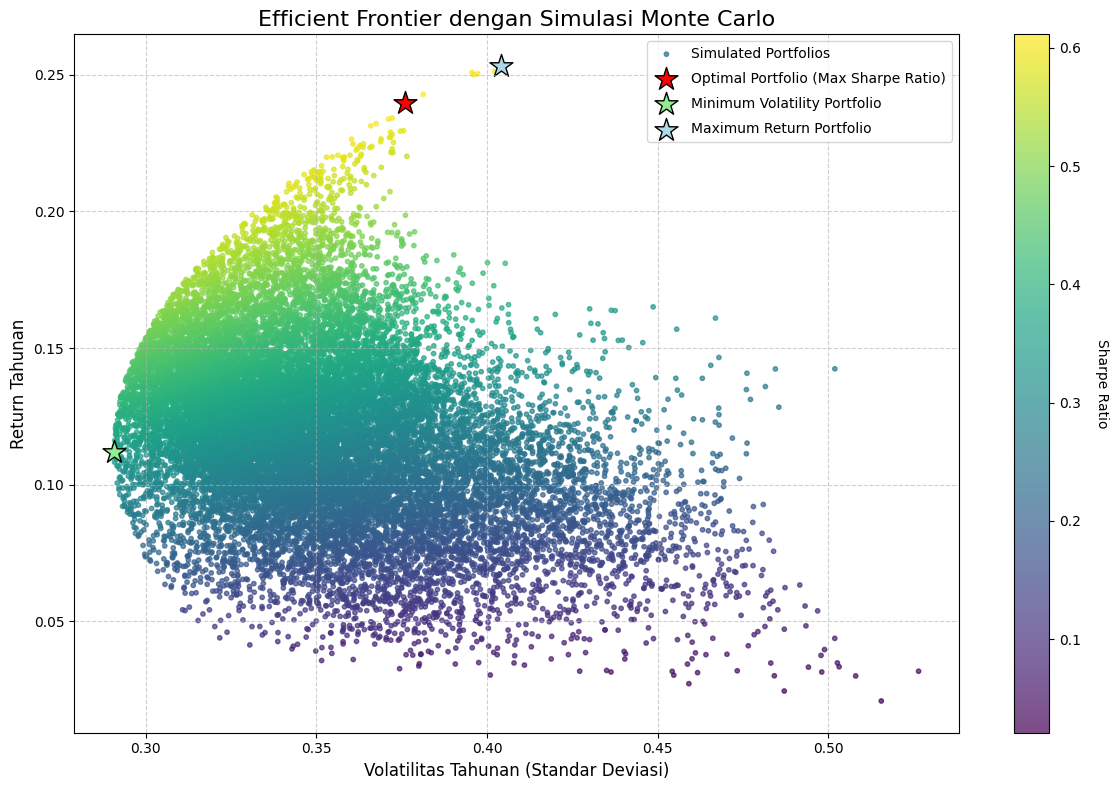

Scatter plot hasil simulasi portofolio telah ditampilkan.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Buat scatter plot dari semua portofolio yang disimulasikan
plt.figure(figsize=(12, 8))

# Scatter plot untuk semua portofolio
scatter = plt.scatter(
    portfolio_results['Volatility'],
    portfolio_results['Return'],
    c=portfolio_results['Sharpe Ratio'], # Warna berdasarkan Sharpe Ratio
    cmap='viridis', # Colormap
    marker='o',
    s=10, # Ukuran marker
    alpha=0.7,
    label='Simulated Portfolios'
)

# 2. Tandai portofolio optimal (Sharpe Ratio tertinggi)
plt.scatter(
    optimal_portfolio['Volatility'],
    optimal_portfolio['Return'],
    marker='*', # Penanda bintang
    color='red',
    s=300, # Ukuran lebih besar
    label='Optimal Portfolio (Max Sharpe Ratio)',
    edgecolors='black',
    linewidth=1
)

# 3. Tandai portofolio risiko minimum
plt.scatter(
    min_volatility_portfolio['Volatility'],
    min_volatility_portfolio['Return'],
    marker='*', # Penanda bintang
    color='lightgreen',
    s=300, # Ukuran lebih besar
    label='Minimum Volatility Portfolio',
    edgecolors='black',
    linewidth=1
)

# 4. Tandai portofolio Return Maksimum
plt.scatter(
    max_return_portfolio['Volatility'],
    max_return_portfolio['Return'],
    marker='*', # Penanda bintang
    color='lightblue',
    s=300, # Ukuran lebih besar
    label='Maximum Return Portfolio',
    edgecolors='black',
    linewidth=1
)

# 4. Tambahkan judul plot dan label sumbu
plt.title('Efficient Frontier dengan Simulasi Monte Carlo', fontsize=16)
plt.xlabel('Volatilitas Tahunan (Standar Deviasi)', fontsize=12)
plt.ylabel('Return Tahunan', fontsize=12)

# 5. Tampilkan legenda dan grid
plt.legend(labelspacing=0.8, loc='best')
plt.grid(True, linestyle='--', alpha=0.6)

# Tambahkan color bar untuk Sharpe Ratio
cbar = plt.colorbar(scatter)
cbar.set_label('Sharpe Ratio', rotation=270, labelpad=20)

# Tampilkan plot
plt.tight_layout()
plt.show()

print("Scatter plot hasil simulasi portofolio telah ditampilkan.")

In [ ]:
print(optimal_portfolio['Volatility'])
print(optimal_portfolio['Return'])
print(optimal_portfolio)

0.37588666872386306
0.23981763695975836
Return          0.239818
Volatility      0.375887
Sharpe Ratio    0.611401
WBD Weight      0.174128
PSKY Weight     0.010115
DIS Weight      0.019444
NFLX Weight     0.796313
Name: 12286, dtype: float64
